In [2]:
import warnings
import logging
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=RuntimeWarning)
logging.getLogger("dowhy").setLevel(logging.WARNING)
logging.getLogger("pgmpy").setLevel(logging.WARNING)

import tqdm
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import statsmodels.api as sm
from IPython.display import display
from causaldata import social_insure
from pgmpy.estimators.CITests import pillai_trace


df: pd.DataFrame = social_insure.load_pandas().data.dropna()
# Drop fields 'address'
df = df.drop(columns=['address'])

# From social insurance, take takeup_survey
takeup_survey = df['takeup_survey']
categorical_variables = ['village']
for var in categorical_variables:
    df[var] = df[var].astype('category').cat.codes


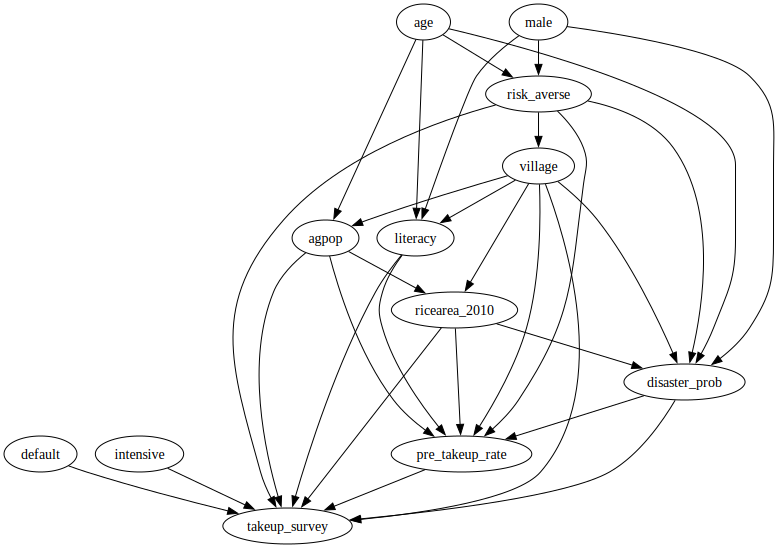

In [31]:
TG = nx.DiGraph()

TG.add_edges_from([
    ('default', 'takeup_survey'),

    ('intensive', 'takeup_survey'),

    ('pre_takeup_rate', 'takeup_survey'),

    ('risk_averse', 'pre_takeup_rate'),
    ('risk_averse', 'takeup_survey'),
    ('risk_averse', 'village'),
    ("risk_averse", "disaster_prob"), # disaster prob is perceived,

    ('disaster_prob', 'pre_takeup_rate'),
    ('disaster_prob', 'takeup_survey'),

    ('literacy', 'pre_takeup_rate'),
    ('literacy', 'takeup_survey'),

    ('village', 'pre_takeup_rate'),
    ('village', 'takeup_survey'),
    ('village', 'literacy'),
    ('village', 'ricearea_2010'),
    ('village', 'disaster_prob'),
    ("village", "agpop"), # certain villages might expect larger families

    ('age', 'agpop'),
    ("age", "literacy"), # older people -> less education (?)
    ("age", "risk_averse"), # older people more risk averse
    ("age", "disaster_prob"), # disaster prob is perceived, so older -> better intuition


    ("agpop", "ricearea_2010"), # larger homes -> more land
    ("agpop", "takeup_survey"), # more security wanted because of family size
    ("agpop", "pre_takeup_rate"), # same as previous

    ("male", "literacy"), # gender gaps in education
    ("male", "risk_averse"), # gender differences in risk attitudes
    ("male", "disaster_prob"), # disaster prob is perceived,

    ("ricearea_2010", "disaster_prob"), # more land -> more chances for disaster
    ("ricearea_2010", "takeup_survey"), # more land -> more at stake
    ("ricearea_2010", "pre_takeup_rate"), # same as previous
    ('ricearea_2010', 'takeup_survey'),
])

# for n in TG.nodes():
#     TG.nodes[n]['style'] = 'filled'
#     TG.nodes[n]['fillcolor'] = 'white'

# # Highlight 'age' and 'male' in red
# for n in ["risk_averse", 'age', "agpop", "takeup_survey"]:
#     TG.nodes[n]['fillcolor'] = 'red'

A = nx.nx_agraph.to_agraph(TG)
A.layout('dot')
display(A)
